In [4]:
#coding:utf-8
import numpy as np
import scipy.stats as sp_stats
import matplotlib.pyplot as plt
from tqdm import tqdm

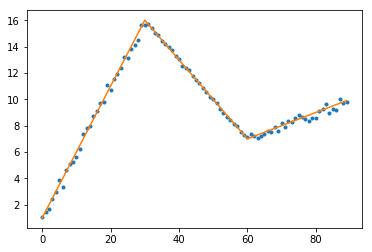

In [5]:
x = np.arange(0,90,1.0)

def yt(t,noise):
    ut = 0
    if 1 <= t <= 30:
        if noise:
            ut = np.random.normal(0,0.3)
        return 1+0.5*t+ut
    elif 31<= t <= 60:
        if noise:
            ut = np.random.normal(0,0.1)
        return 25-0.3*t+ut
    else:
        if noise:
            ut = np.random.normal(0,0.2)
        return 1+0.1*t+ut

y = [yt(xx,True) for xx in x]
y_true = [yt(xx,False) for xx in x]
plt.plot(x,y,".")
plt.plot(x,y_true)
plt.show()

In [6]:
#データに定数項を吸収させる
xt = np.array([[xx,1] for xx in x])
xt[0].shape

(2,)

In [7]:
class ILMM:
    def __init__(self,x,y,mu0,V0,Sigma0,n0,tau0,m0,nu0,alpha):
        """const"""
        
        #mu prior
        self.mu0 = mu0
        self.V0 = V0
        self.invV0 = np.linalg.inv(self.V0)
        
        #Sigma prior
        self.nu0 = nu0
        self.Sigma0 = Sigma0
        self.invSigma0 = np.linalg.inv(Sigma0)
        
        
        #sigma_k prioir
        self.n0 = n0
        ##tau piror
        self.m0 = m0
        self.tau0 = tau0
    
        
        self.alpha = alpha
        
        #dynamic_variable
        self.x = x
        self.y = y
        
        self.num_data = len(x)
        print(self.num_data)
        
        #parameter 
        self.K = 3
        self.K_plus = 3
        
        
        self.z = np.random.randint(0,self.K,self.num_data)
        self.nk = [0 for _ in range(self.K)]
        for z in self.z:
            self.nk[z] += 1
        
        self.Tau_k = [[] for _ in range(self.K)]
        for t,z in enumerate(self.z):
            self.Tau_k[z].append(t)
        
        
        self.invSigma = self.sample_Wishart(self.nu0,self.Sigma0)
        self.Sigma = np.linalg.inv(self.invSigma)
        
        self.tau = self.sample_Gamma(self.m0/2.,self.tau0/2.)
        self.mu = self.sample_gauss(self.mu0,self.V0)
        
        self.theta = [self.sample_gauss(self.mu,self.Sigma) for _ in range(self.K)]
        self.sigma = [self.sample_invGamma(self.n0/2.,self.tau/2.) for _ in range(self.K)]
        
        
    """def sampling_z(self):
        theta_new = self.sample_gauss(self.mu,self.Sigma)
        sigma_new = self.sample_invGamma(self.n0/2.,self.tau/2.)
        
        
        for t,now_z in enumerate(self.z):
            self.nk[now_z] -= 1
            
            p_z = [0 for _ in range(self.K)]
                   
            for k in range(self.K):
                p_z[k] = self._Gaussian_pdf(self.y[t],sum(self.theta[k]*self.x[t]),self.sigma[k])*self.nk[k]
            p_z.append(self._Gaussian_pdf(self.y[t],sum(theta_new*self.x[t]),sigma_new)*self.alpha)
            
            new_z = np.random.multinomial(1,np.array(p_z/sum(p_z))).argmax()
            
            self.z[t] = new_z
            if new_z == self.K:
                self.K += 1
                
                self.theta.append(theta_new)
                self.sigma.append(sigma_new)
                
                theta_new = self.sample_gauss(self.mu,self.Sigma)
                sigma_new = self.sample_invGamma(self.n0/2.,self.tau/2.)
                
                self.nk.append(1)
                
            else:
                
                self.nk[new_z] += 1
        
        ##後処理
        self.Tau_k = [[] for _ in range(self.K)]
        for t,z in enumerate(self.z):
            self.Tau_k[z].append(t)
        
        self.K_plus = 0
        pick_up = []
        new_Tau_k = []
        for k,Tau in enumerate(self.Tau_k):
            if Tau:
                self.K_plus += 1
                new_Tau_k.append(Tau)
                pick_up.append(k)
        
        self.Tau_k = new_Tau_k
        self.nk = [len(Tau) for Tau in self.Tau_k]
        
        self.theta = [self.theta[k] for k in pick_up]
        self.sigma = [self.sigma[k] for k in pick_up]
        for t,z in enumerate(self.z):
            self.z[t] = pick_up.index(z)
        self.K = self.K_plus
        """
    def sampling_z(self):
        
        
        for t in range(self.num_data):
            old_k = self.z[t]
            if old_k != -1:
                if self.nk[old_k] == 1:
                    del self.nk[old_k]
                    del self.theta[old_k]
                    del self.sigma[old_k]
            
            p_z = []
            _k = 0
            for k in self.n:
                if k==self.new_class:
                    theta = self.sample_gauss(self.mu,self.Sigma)
                    sigma = self.sample_invGamma(self.n0/2.,self.tau/2.)
                    pi = self.alpha
                    new_theta = theta.copy()
                    new_sigma = sigma.copy()
                else:
                    theta = self.theta[k]
                    sigma = self.sigma[k]
                    pi = self.n[k]
     
                p_z.append(self._Gaussian_pdf(self.y[t],sum(self.theta*self.x[t]),self.sigma[k])*self.nk[k])
                classes[_k] = k
                _k += 1
                           
            new_z = classes[np.random.multinomial(1,np.array(p_z/sum(p_z))).argmax()]
            self.z[t] = new_z
            self.n[new_z] += 1
            if new_z == self.new_class:
                self.theta[self.new_class] = new_theta
                self.sigma[self.new_class] = new_sigma
                while True:
                    if not j in self.n:
                        self.n[j] = 0
                        self.new_class = j
                    j += 1
     
        
    def sampling_theta(self):
        #k個分行う
        for k in range(self.K_plus):
            if self.Tau_k[k]:
                tmp1 = np.zeros((2,2))
                tmp2 = np.zeros(2)
                for t in self.Tau_k[k]:
                    tmp1 += self.x[t][:,np.newaxis]@self.x[t][:,np.newaxis].T/self.sigma[k]  
                    tmp2 += self.y[t]*self.x[t]/self.sigma[k]  
                
                Sigma_k =  np.linalg.inv(tmp1+self.invSigma)
                mu_k = Sigma_k@(tmp2 + self.invSigma@self.mu)
                self.theta[k] = self.sample_gauss(mu_k,Sigma_k)
    
    def sampling_sigma(self):
        #k個分行う
        for k in range(self.K_plus):
            if self.Tau_k[k]:
                tauk = self.tau
                for t in self.Tau_k[k]:
                    tauk += (self.y[t]-self.theta[k].T@self.x[t])**2
                self.sigma[k] = self.sample_invGamma((self.n0+self.nk[k])/2.,tauk/2.)
            
    
    def sampling_mu(self):
        invV_plus = self.K_plus*self.invSigma+self.invV0
        V_plus = np.linalg.inv(invV_plus)
        
        tmp = 0
        for k,Tau in enumerate(self.Tau_k):
            if Tau:
                tmp += self.theta[k]
        mu_plus = V_plus@(self.invSigma@tmp\
                          +self.invV0@self.mu0)
        self.mu = self.sample_gauss(mu_plus,V_plus)
    
    def sampling_Sigma(self):
        nu_plus = self.nu0 + self.K_plus
        tmp = 0
        for k,Tau in enumerate(self.Tau_k):
            if Tau:
                tmp += (self.theta[k]-self.mu)@(self.theta[k]-self.mu).T
        Sigma_plus = np.linalg.inv(self.invSigma0+tmp)
        
        self.Sigma = np.linalg.inv(self.sample_Wishart(nu_plus,Sigma_plus))
        
        
        
    def sampling_tau(self):
        m_plus = self.m0 + self.n0*self.K_plus
        tau_plus = self.tau0 
        for k,Tau in enumerate(self.Tau_k):
            if Tau:
                tau_plus += 1./self.sigma[k]
        self.tau = self.sample_Gamma(m_plus/2.,tau_plus/2.)
      
    
    
    def _Gaussian_pdf(self,x,mu,Sigma):
        return np.exp(-0.5*(x-mu)**2/Sigma)/(2*np.pi*Sigma)**(0.5) # not normalized
        #return sp_stats.norm.pdf(x,mu,Sigma) 
    
    def sample_gauss(self, mu, Sigma):
        return np.random.multivariate_normal(mu,Sigma)
        #return sp_stats.norm.rvs(mu,Sigma)

    def sample_invGamma(self,a,b):
        return sp_stats.invgamma.rvs(a,b)
    
    def sample_Gamma(self, a, b):
        return np.random.gamma(a, b)
    
    def sample_Wishart(self, nu, Sigma):
        return sp_stats.wishart.rvs(nu, Sigma)
    
    def inference(self):
        self.sampling_z()
        self.sampling_theta()
        self.sampling_sigma()
        self.sampling_mu()
        self.sampling_Sigma()
        self.sampling_tau()
        

In [8]:
model = ILMM(x=xt,
             y=y,
             mu0 = np.array([0,0]),
             V0 = np.eye(2)*10,
             Sigma0 = np.eye(2),
             n0 = 1.0,
             tau0 = 1.0,
             m0 = 1.0,
             nu0 = 3.0,
             alpha = 1.0)

90
